In [1]:
import sys
sys.path.insert(0,'..')

from src.models import *
from src.loss_functions import *
from src.noise import *
from src.metrics import *
from src.plotting import *
from src.generate_data import *
from src.real_data import *
from src.abstain import *

import sklearn
import pandas as pd

from scipy.stats import bernoulli

from operator import xor

import os

In [2]:
# Define parameters
dataset = "cshock_eicu"
noise_type = "class_conditional"
batch_size = 1024
n_draws = 5
model_type = "LR"
training_loss = "None"
n_models = 5
max_iter = 1000
epsilon = 0.1
misspecify = "correct"

data = load_abstain(dataset, model_type, noise_type, misspecify=misspecify)

# X_train, X_test, y_train, y_test, group_train, group_test = load_dataset_splits(dataset, group = "age")
# p_y_x_dict =  calculate_prior(y_train, noise_type = noise_type, group=group_train) #Clean prior


In [ ]:
results_df = metrics_active_learning(dataset, noise_type, model_type, data)

# Save results
#results_df.to_csv("experiment_results.csv", index=False)

Processing Draws:   0%|          | 0/5 [00:00<?, ?it/s]

Processing Abstain Levels:   0%|          | 0/5 [00:00<?, ?it/s]

Processing Abstain Levels:   0%|          | 0/5 [00:00<?, ?it/s]

Processing Abstain Levels:   0%|          | 0/5 [00:00<?, ?it/s]

Processing Abstain Levels:   0%|          | 0/5 [00:00<?, ?it/s]

In [8]:
# parent_dir = "/scratch/hdd001/home/snagaraj/"
# files_path = os.path.join(parent_dir, "results", "abstain", dataset, model_type, noise_type, "correct")

# pkl_path = os.path.join(files_path, f"{epsilon}.pkl")
# csv_path = os.path.join(files_path, "results.csv")

#     # Open a file for writing in binary mode
# with open(pkl_path, 'rb') as file:
#     # Use pickle to write the dictionary to the file
#     data = pkl.load(file)


# results_df = pd.read_csv(csv_path)

# results_df

In [9]:
results_df[(results_df["metric"]== "regret") & (results_df["experiment_type"]== "drop")]

,metric,value,coverage,threshold,noise,loss,draw_id,method,experiment_type
13,regret,2.966715,100.0,0.0,0.05,BCE,0,confidence,drop
21,regret,2.966715,100.0,0.0,0.05,BCE,0,ambiguity,drop
108,regret,2.098408,100.0,0.0,0.05,BCE,1,confidence,drop
116,regret,2.098408,100.0,0.0,0.05,BCE,1,ambiguity,drop
203,regret,2.315485,100.0,0.0,0.05,BCE,2,confidence,drop
211,regret,2.315485,100.0,0.0,0.05,BCE,2,ambiguity,drop
298,regret,2.532562,100.0,0.0,0.05,BCE,3,confidence,drop
306,regret,2.532562,100.0,0.0,0.05,BCE,3,ambiguity,drop
393,regret,2.677279,100.0,0.0,0.05,BCE,4,confidence,drop
401,regret,2.677279,100.0,0.0,0.05,BCE,4,ambiguity,drop


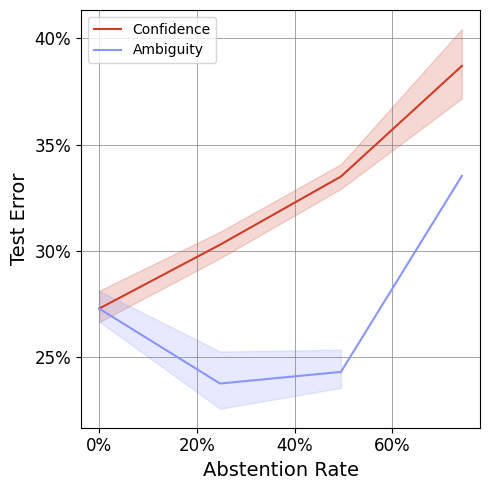

In [21]:
import matplotlib.ticker as mtick

# List of datasets and renamed titles
datasets = ["cshock_eicu", "cshock_mimic", "support", "lungcancer"]

dataset_titles = {
    "cshock_eicu": "shock_eicu",
    "cshock_mimic": "shock_mimic",
    "saps": "mortality",
    "support": "support",
    "lungcancer": "lungcancer"
}

# Only plot regret metric
metrics = ["risk"]

# Define your custom color palette for each method
method_colors = {
    "Ambiguity": "#8896FB",  # Purple
    "Majority":  "#800080",  # Red
    "Loo":  "#00FF00",
    "Mean_plausible":  "#228B22",
    "Conformal": "#93C572",
    "Confidence": "#ce3d26",
    "Entropy": "#2478d8"  # Grey
}

y_labels = {"risk": "Test Error"}

experiment_type = "drop"
loss_type = "BCE"
noise_level = 0.2

# Create a figure with 1 row (only for regret metric)
fig, ax = plt.subplots(1, 1, figsize=(5, 5), sharex=True)

# Read the data and process
results_df['method'] = results_df['method'].str.capitalize()
results_df["abstention"] = 100 - results_df["coverage"]

# Subset data based on loss_type, noise_level, and experiment_type
sub_data = results_df[(results_df["loss"] == loss_type) & (results_df["noise"] == noise_level) & (results_df["experiment_type"] == experiment_type)]

# Plot regret metric
for method in sub_data['method'].unique():
    method_data = sub_data[(sub_data['method'] == method) & (sub_data['metric'] == "risk")]
    sns.lineplot(data=method_data, x="abstention", y="value", ax=ax, color=method_colors.get(method, "#808080"), label=method)

# Set labels and grid
ax.set_xlabel("Abstention Rate", fontsize=14)
ax.set_ylabel(y_labels["risk"], fontsize=14)
ax.yaxis.get_major_locator().set_params(integer=True)
ax.xaxis.set_major_formatter(mtick.PercentFormatter(decimals=0))
ax.yaxis.set_major_formatter(mtick.PercentFormatter(decimals=0))
ax.grid(True, which='both', color='grey', linestyle='-', linewidth=0.5)
ax.tick_params(axis='both', which='major', labelsize=12)

plt.tight_layout()
plt.show()


In [ ]:
sub_data[sub_data["metric"]=="regret"]